In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scipy.stats as stats

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [27]:
#Authentication - without user
client_credentials_manager = SpotifyClientCredentials(client_id="474c3020d8e840688bcc94a1d71ee730", client_secret="a3f12c07c05f45d89024e452eb10cda3")
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [28]:
playlist_link = "https://open.spotify.com/playlist/37i9dQZEVXbNG2KDcFcKOF?si=f747a21eda4d4eda"
playlist_URI = playlist_link.split("/")[-1].split("?")[0]
track_uris = [x["track"]["uri"] for x in sp.playlist_tracks(playlist_URI)["items"]]

In [29]:
data = {}
# data['track_uri'] = []
data['track_name'] = []
data['artist_name'] = []
data['album_name'] = []
data['artist_genres'] = []
data['track_popularity'] = []
data['artist_popularity'] = []
data['mood_danceability'] = []
data['mood_valence'] = []
data['mood_energy'] = []
data['mood_tempo'] = []
data['prop_loudness'] = []
data['prop_speechiness'] = []
data['prop_instrumentalness'] = []
data['context_liveness'] = []
data['context_acousticness'] = []



for track in sp.playlist_tracks(playlist_URI)["items"]:
    #URI
    track_uri = track["track"]["uri"]
    # print(track_uri)
    # data['track_uri'].append(track_uri)

    #Track number
    # track_number = track["track"]["track_number"]
    # print(track_number)

    #Track name
    track_name = track["track"]["name"]
    # print(track_name)
    data['track_name'].append(track_name)
    
    #Main Artist
    artist_uri = track["track"]["artists"][0]["uri"]
    # print(artist_uri)
    artist_info = sp.artist(artist_uri)
    # print(artist_info)
    
    #Name, popularity, genre
    artist_name = track["track"]["artists"][0]["name"]
    data['artist_name'].append(artist_name)
    artist_pop = artist_info["popularity"]
    data['artist_popularity'].append(artist_pop)
    artist_genres = artist_info["genres"]
    data['artist_genres'].append(artist_genres)
    
    #Album
    album = track["track"]["album"]["name"]
    data['album_name'].append(album)
    
    #Popularity of the track
    track_pop = track["track"]["popularity"]
    data['track_popularity'].append(track_pop)

    #Audio features
    audio_features = sp.audio_features(track_uri)
    data['mood_danceability'].append(audio_features[0]["danceability"])
    data['mood_valence'].append(audio_features[0]["valence"])
    data['mood_energy'].append(audio_features[0]["energy"])
    data['mood_tempo'].append(audio_features[0]["tempo"])
    data['prop_loudness'].append(audio_features[0]["loudness"])
    data['prop_speechiness'].append(audio_features[0]["speechiness"])
    data['prop_instrumentalness'].append(audio_features[0]["instrumentalness"])
    data['context_liveness'].append(audio_features[0]["liveness"])
    data['context_acousticness'].append(audio_features[0]["acousticness"])
    # print(audio_features)
    # print(audio_features[0]['danceability'])

In [32]:

df = pd.DataFrame(data)
df.index += 1
df.to_csv('data.csv')

<AxesSubplot:xlabel='context_acousticness', ylabel='track_popularity'>

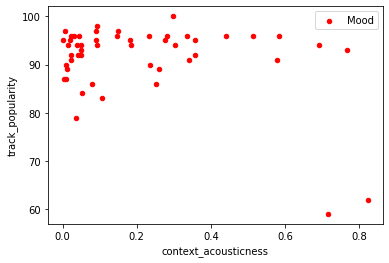

In [50]:
df.plot(kind='scatter', x='context_acousticness', y='track_popularity', color='red', label='Mood')

In [42]:
sample_df = df.sample(n=10).sort_index()
sample_df.to_csv('sample-data.csv')
sample_df

,track_name,artist_name,album_name,artist_genres,track_popularity,artist_popularity,mood_danceability,mood_valence,mood_energy,mood_tempo,prop_loudness,prop_speechiness,prop_instrumentalness,context_liveness,context_acousticness
5,Enemy (with JID) - from the series Arcane Leag...,Imagine Dragons,Mercury - Act 1,"[modern rock, rock]",90,92,0.728,0.5550,0.783,77.011,-4.424,0.2660,0.000000,0.4340,0.23700
7,abcdefu,GAYLE,abcdefu,[modern alternative pop],100,83,0.695,0.4150,0.540,121.932,-5.692,0.0493,0.000000,0.3670,0.29900
8,INDUSTRY BABY (feat. Jack Harlow),Lil Nas X,MONTERO,"[lgbtq+ hip hop, pop]",91,89,0.741,0.8920,0.691,150.087,-7.395,0.0672,0.000000,0.0476,0.02210
17,Easy On Me,Adele,30,"[british soul, pop, pop soul, uk pop]",91,91,0.604,0.1300,0.366,141.981,-7.519,0.0282,0.000000,0.1330,0.57800
18,THATS WHAT I WANT,Lil Nas X,MONTERO,"[lgbtq+ hip hop, pop]",97,89,0.737,0.5460,0.846,87.981,-4.510,0.2200,0.000000,0.0486,0.00614
25,Infinity,Jaymes Young,Feel Something,"[modern rock, pop]",96,81,0.671,0.4940,0.673,121.963,-6.941,0.0444,0.000053,0.3040,0.14800
36,Kiss Me More (feat. SZA),Doja Cat,Planet Her,"[dance pop, pop]",89,94,0.764,0.7810,0.705,110.970,-3.463,0.0284,0.000089,0.1200,0.25900
39,traitor,Olivia Rodrigo,SOUR,[pop],94,90,0.380,0.0849,0.339,100.607,-7.885,0.0338,0.000000,0.1200,0.69100
43,Levitating (feat. DaBaby),Dua Lipa,Future Nostalgia,"[dance pop, pop, uk pop]",90,94,0.702,0.9150,0.825,102.977,-3.787,0.0601,0.000000,0.0674,0.00883
47,drivers license,Olivia Rodrigo,SOUR,[pop],93,90,0.561,0.1370,0.431,143.875,-8.810,0.0578,0.000014,0.1060,0.76800
